In [1]:
import xarray as xr
import numpy as np
import cftime
import nc_time_axis
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
#from cftime import datetime 
from datetime import datetime, timedelta
#import datetime as dt
import matplotlib.colors as colors
import math
import random
import matplotlib.cm as mcm
from matplotlib.ticker import MaxNLocator
#jet = mcm.get_cmap('jet')
jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')
import netCDF4 as nc
import sys
import os
import psutil
import netCDF4 as nc
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from dateutil import tz
import pytz
import time
from time import process_time
from tqdm import tqdm
from dask.distributed import LocalCluster, Client
import dask.array as da
import dask.dataframe as dd
import dask
from dask import delayed
from dask.diagnostics import ProgressBar  # Import the ProgressBar class
import calendar
import glob
%matplotlib inline 
#import line_profiler
#%load_ext line_profiler

/tmp/ipykernel_269578/1870643686.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')


# Factor Calculation - Lat-Lon Coords

In [2]:
# Need to change seasonal data manually

# season = 'spr'
# fp1 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-03-*.nc'
# fp2 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-04-*.nc'
# fp3 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-05-*.nc' 

# season = 'sum'
# fp1 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-06-*.nc'
# fp2 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-07-*.nc'
# fp3 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-08-*.nc'

# season = 'aut'
# fp1 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-09-*.nc'
# fp2 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-10-*.nc'
# fp3 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-11-*.nc'

season = 'win'
fp1 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-12-*.nc'
fp2 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-01-*.nc'
fp3 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-02-*.nc'

ds_list = []
ds_1 = xr.open_mfdataset(fp1)
ds_2 = xr.open_mfdataset(fp2)
ds_3 = xr.open_mfdataset(fp3)
ds_list = [ ds_1, ds_2, ds_3 ]       
ds_combined = xr.concat(ds_list, dim='time')

timee = ds_combined.variables['time']
lon = ds_combined.variables['lon']
lat = ds_combined.variables['lat']
lev = ds_combined.variables['lev']
dst = ds_combined.transpose("lev", ...)

geopH = dst.variables['Z3'] / 1000 #m-> km
Zavg = geopH.mean(('time','lat', 'lon'))

temp = dst.variables['T']
Fep = dst.variables['Fep']
Mgp = dst.variables['Mgp']
Nap = dst.variables['Nap']

Fepav = Fep.mean(dim='time')
Mgpav = Mgp.mean(dim='time')
Napav = Nap.mean(dim='time')

#===================================================================================================

altitude_min = 81
altitude_max = 130

max_index = np.argmin(np.abs(Zavg.values - altitude_min))
min_index = np.argmin(np.abs(Zavg.values - altitude_max))

# Slice the array along the altitude dimension
Fep_sliced = Fepav[min_index:max_index + 1,:,:]
Nap_sliced = Napav[min_index:max_index + 1,:,:]
Mgp_sliced = Mgpav[min_index:max_index + 1,:,:]

Zavg_sliced = Zavg[min_index:max_index + 1]
lev_sliced = lev[min_index:max_index + 1]

M_Factor = ( Nap_sliced + Mgp_sliced + Mgp_sliced + Fep_sliced) / Fep_sliced


########### Save to nc file ##########
result_dataset = xr.Dataset()

# Create xarray DataArray for M_Factor
result_dataarray_M = xr.DataArray(M_Factor, coords={'lev': lev_sliced, 'lat': lat, 'lon': lon},
                                  dims=['lev', 'lat', 'lon'],
                                  name='M_Factor_{season}',
                                  attrs={'description': '(Nap_sl+Mgp_sl+Mgp_sl+Fep_sl)/Fep_sl', 'season':season})

Zavg_sliced_dataarray= xr.DataArray(Zavg_sliced, coords={'lev': lev_sliced},
                                  dims=['lev'],
                                  name='Zavg_sliced'
                                  )

# Add DataArrays as variables to the Dataset
result_dataset[f'M_Factor_{season}'] = result_dataarray_M
result_dataset['Zavg_sliced'] = Zavg_sliced_dataarray

output_directory = "./Nc_Files/Factor/"
output_file = f"M_Factor_{season}_{altitude_min}-{altitude_max}km.nc"
output_path = os.path.join(output_directory, output_file)


try:
    result_dataset.to_netcdf(output_path)
    print(f"File saved successfully: {output_path}")
except Exception as e:
    print(f"Error saving the file: {e}")
finally:
    result_dataset.close()


File saved successfully: ./Nc_Files/Factor/M_e_Factor_win_81-130km.nc


# Factor Calculation - Local Time

In [3]:
# season = 'spr'
# fp1 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-03-*.nc'
# fp2 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-04-*.nc'
# fp3 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-05-*.nc' 

# season = 'sum'
# fp1 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-06-*.nc'
# fp2 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-07-*.nc'
# fp3 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-08-*.nc'

# season = 'aut'
# fp1 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-09-*.nc'
# fp2 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-10-*.nc'
# fp3 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-11-*.nc'

season = 'win'
fp1 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-12-*.nc'
fp2 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-01-*.nc'
fp3 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-02-*.nc'

ds_list = []
ds_1 = xr.open_mfdataset(fp1)
ds_2 = xr.open_mfdataset(fp2)
ds_3 = xr.open_mfdataset(fp3)
ds_list = [ ds_1, ds_2, ds_3 ]       
ds_combined = xr.concat(ds_list, dim='time')

timee = ds_combined.variables['time']
lon = ds_combined.variables['lon']
lat = ds_combined.variables['lat']
lev = ds_combined.variables['lev']
dst = ds_combined.transpose("lev", ...)

geopH = dst.variables['Z3'] / 1000 #m-> km
Zavg = geopH.mean(('time','lat', 'lon'))

temp = dst.variables['T']
Fep = dst.variables['Fep']
Mgp = dst.variables['Mgp']
Nap = dst.variables['Nap']

Fepav = Fep.mean(dim='time')
Mgpav = Mgp.mean(dim='time')
Napav = Nap.mean(dim='time')

#===================================================================================================

altitude_min = 81
altitude_max = 130

max_index = np.argmin(np.abs(Zavg.values - altitude_min))
min_index = np.argmin(np.abs(Zavg.values - altitude_max))

Fep_sl = Fep[min_index:max_index + 1,:,:,:]    # (126, 2208, 96, 144) -> (25, 2208, 96, 144)
Nap_sl = Nap[min_index:max_index + 1,:,:,:]
Mgp_sl = Mgp[min_index:max_index + 1,:,:,:]

Zavg_sliced = Zavg[min_index:max_index + 1]
lev_sliced = lev[min_index:max_index + 1]

timelenn = int(timee.size / 24)

# Create an array with offset needed for each UT time step (24h period)
# Offset by 15 degrees lon each time, lon axis is in 2.5 degree intervals
offset =  np.arange(0,24) * 15 / 2.5 
offset = offset.astype(int)
offsett = np.tile(offset, timelenn) #tile the array for 3 months of 1hrly timesteps


lon = ds_combined.variables['lon']
# Calculate the time offset for each longitude
time_offset = (lon / 360) * 24  # Convert degrees to hours
# Calculate the local time
local_time = (time_offset) % 24

Fep_slsh = np.empty( (lev_sliced.size, timee.size, lat.size, lon.size) )
Nap_slsh = np.empty( (lev_sliced.size, timee.size, lat.size, lon.size) )
Mgp_slsh = np.empty( (lev_sliced.size, timee.size, lat.size, lon.size) )

timear = np.arange(0,timee.size)
for it in tqdm(timear): 
    Fep_slsh[:,it,:,:]   = np.roll(Fep_sl[:,it,:,:], offsett[it] , axis=2)
    Nap_slsh[:,it,:,:]   = np.roll(Nap_sl[:,it,:,:], offsett[it] , axis=2)
    Mgp_slsh[:,it,:,:]   = np.roll(Mgp_sl[:,it,:,:], offsett[it] , axis=2)
 
    
M_F_time_sh = ( Nap_slsh + Mgp_slsh + Mgp_slsh + Fep_slsh) / Fep_slsh
M_Factor_LT = np.mean(M_F_time_sh, axis=1)

Fep_LT = np.mean(Fep_slsh, axis=1)
Nap_LT = np.mean(Nap_slsh, axis=1)
Mgp_LT = np.mean(Mgp_slsh, axis=1)

########### Save M_Factor_LT to nc file ##########

# Create an empty xarray Dataset to store variables
result_dataset = xr.Dataset()

# Create xarray DataArray for M_Factor
result_dataarray_M = xr.DataArray(M_Factor_LT, coords={'lev': lev_sliced, 'lat': lat, 'LT': local_time.values},
                                  dims=['lev', 'lat', 'LT'],
                                  name='M_Factor_LT',
                                  attrs={'description': '(Nap_slsh+Mgp_slsh+Mgp_slsh+Fep_slsh)/Fep_slsh'})


Fep_LT_dataarray = xr.DataArray(Fep_LT, coords={'lev': lev_sliced, 'lat': lat, 'LT': local_time.values},
                                  dims=['lev', 'lat', 'LT'],
                                  name='Fep_LT')

Mgp_LT_dataarray = xr.DataArray(Mgp_LT, coords={'lev': lev_sliced, 'lat': lat, 'LT': local_time.values},
                                  dims=['lev', 'lat', 'LT'],
                                  name='Mgp_LT')

Nap_LT_dataarray = xr.DataArray(Nap_LT, coords={'lev': lev_sliced, 'lat': lat, 'LT': local_time.values},
                                  dims=['lev', 'lat', 'LT'],
                                  name='Nap_LT')


Zavg_sliced_dataarray= xr.DataArray(Zavg_sliced, coords={'lev': lev_sliced},
                                  dims=['lev'],
                                  name='Zavg_sliced'
                                  )


# Add DataArrays as variables to the Dataset
result_dataset['M_Factor_LT'] = result_dataarray_M

result_dataset['Fep_LT'] = Fep_LT_dataarray
result_dataset['Mgp_LT'] = Mgp_LT_dataarray
result_dataset['Nap_LT'] = Nap_LT_dataarray

result_dataset['Zavg_sliced'] = Zavg_sliced_dataarray

output_directory = "./Nc_Files/Factor/"
output_file = f"M_Factor_{season}_LT_{altitude_min}-{altitude_max}km.nc"
output_path = os.path.join(output_directory, output_file)

try:
    result_dataset.to_netcdf(output_path)
    print(f"File saved successfully: {output_path}")
except Exception as e:
    print(f"Error saving the file: {e}")
finally:
    result_dataset.close()


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2160/2160 [19:47<00:00,  1.82it/s]


File saved successfully: ./Nc_Files/Factor/M_Factor_win_LT_81-130km.nc


# P L O T S

# M_Factor: Lat-Lon Coords

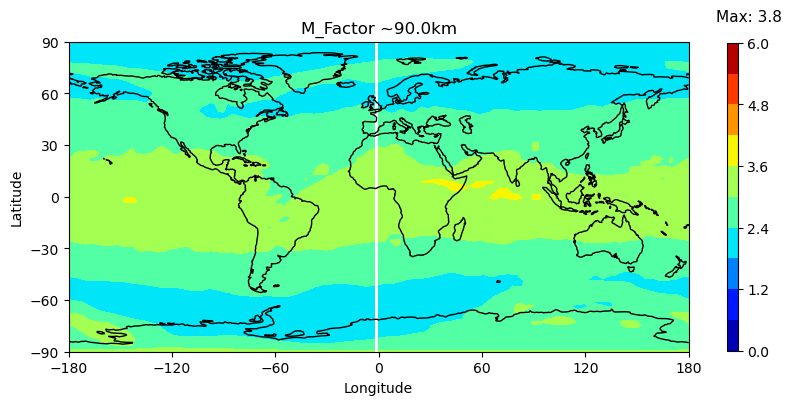

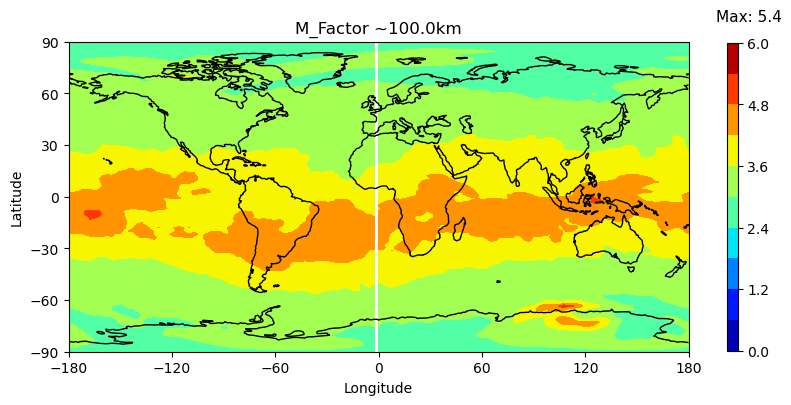

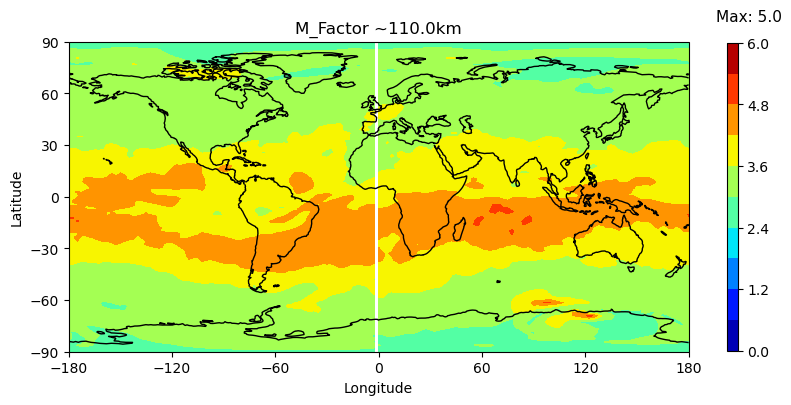

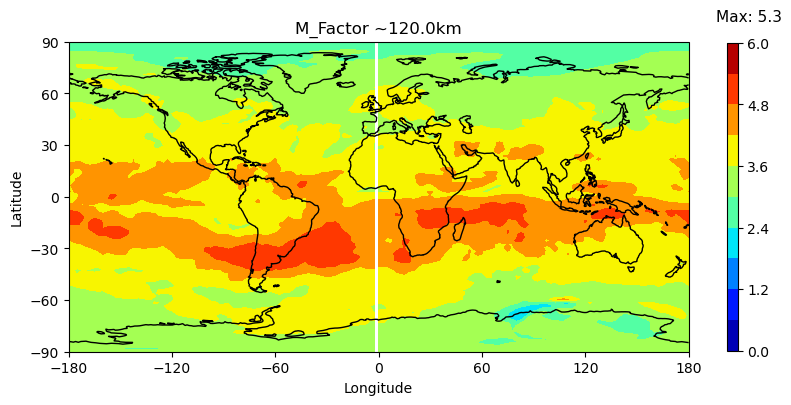

In [86]:
season = 'spr'
ds_M_Factor = xr.open_dataset(f'Nc_Files/Factor/M_Factor_{season}_81-130km.nc')


M_Factor = ds_M_Factor['M_Factor_spr']
lev = ds_M_Factor['lev']
lat = ds_M_Factor['lat']
lon = ds_M_Factor['lon']
#Zavg_sliced = ds_M_Factor['Zavg_sliced']


####### Choose altitude for plot and select variables ########

desired_altitudes_km = [90.0, 100.0, 110.0, 120.0]

for desired_altitude_km in desired_altitudes_km:
    
    # Find the index of the closest altitude in geopH
    closest_altitude_index = np.abs(Zavg_sliced - desired_altitude_km).argmin(dim='lev')

    # Use the index to select values from the 'Factor' variable
    sel_M_Factor = M_Factor.isel(lev=closest_altitude_index)




    ####### Plot M_Factor at specified altitude ########

    max_value = sel_M_Factor.values.max()
    formatted_max_value = f'{max_value:.1f}'

    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    contour = ax.contourf(lon, lat, sel_M_Factor, cmap='jet', levels=np.linspace(0, 6, 11)
                          , transform=ccrs.PlateCarree())
    cbar = plt.colorbar(contour
                        #, label=''
                        , ax=ax, orientation='vertical', pad=0.05, aspect=30, shrink=0.5)
    ax.coastlines()

    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_xlabel('Longitude')
    ax.set_yticks(np.linspace(-90, 90, 7))
    ax.set_ylabel('Latitude')
    ax.set_title(f'M_Factor ~{desired_altitude_km}km')

    annotation_text = f'Max: {formatted_max_value}'
    # Add annotation above the colorbar
    fig.text(0.805, 0.72, annotation_text, ha='center', va='center', fontsize=11)

    #gl = ax.gridlines(draw_labels=True, linestyle='--')

    figname = f'{season}_M_Factor_{desired_altitude_km}.png'
    plt.savefig('./Figures/Factor/' + str(figname), dpi=400, bbox_inches='tight')

    plt.show()

# M_Factor_LT:  Lat - Local Time  Coords

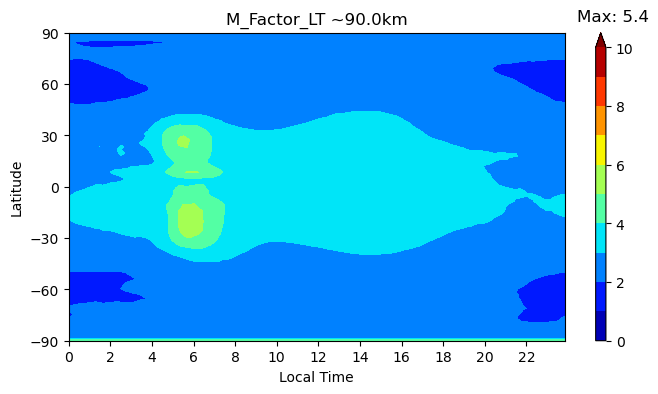

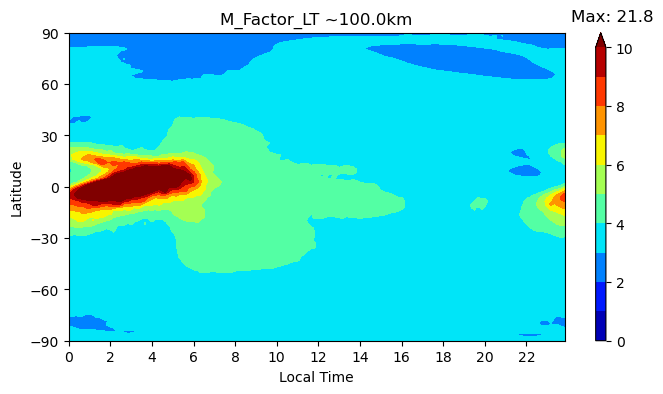

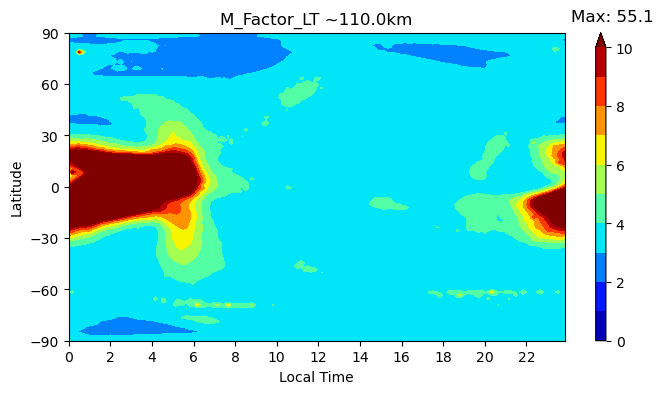

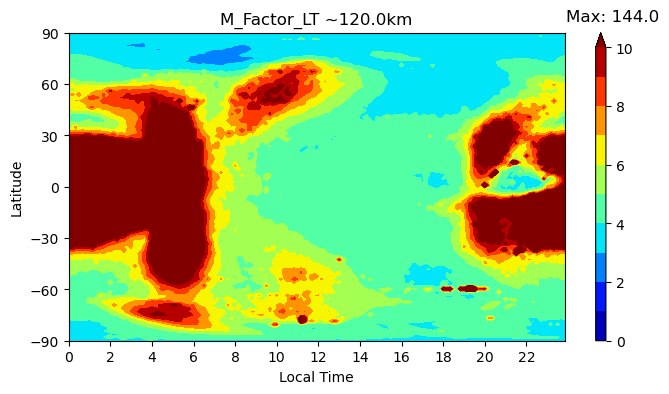

In [69]:
season = 'spr'
ds_M_Factor_LT = xr.open_dataset(f'./Nc_Files/Factor/M_Factor_{season}_LT_81-130km.nc')


M_Factor_LT = ds_M_Factor_LT['M_Factor_LT']
lev = ds_M_Factor_LT['lev']
lat = ds_M_Factor_LT['lat']
LT = ds_M_Factor_LT['LT']
Zavg_sliced = ds_M_Factor_LT['Zavg_sliced']


####### Choose altitude for plot and select variables ########


desired_altitudes_km = [90.0, 100.0, 110.0, 120.0]

for desired_altitude_km in desired_altitudes_km:
    
    # Find the index of the closest altitude in geopH
    closest_altitude_index = np.abs(Zavg_sliced - desired_altitude_km).argmin(dim='lev')

    # Use the index to select values from the 'Factor' variable
    sel_M_Factor_LT = M_Factor_LT.isel(lev=closest_altitude_index)


    #---------------------------------------------------------------------------

    max_value = sel_M_Factor_LT.values.max()
    formatted_max_value = f'{max_value:.1f}'

    from matplotlib.colors import LogNorm

    fig, ax = plt.subplots(figsize=(8,4))
    contour = ax.contourf(LT, lat, sel_M_Factor_LT
                          , cmap='jet'
                          #, norm=LogNorm() 
                          , levels=np.linspace(0, 10, 11)
                          , extend='max'
                         )
    cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=30)

    #ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_xlabel('Local Time')
    ax.set_yticks(np.linspace(-90, 90, 7))
    ax.set_ylabel('Latitude')
    ax.set_title(f'M_Factor_LT ~{desired_altitude_km}km')

    LT_ticks = np.arange(0,24,24/144)
    ax.set_xticks(LT_ticks[::12])

    annotation_text = f'Max: {formatted_max_value}'

    # Add annotation above the colorbar
    fig.text(0.805, 0.92, annotation_text, ha='center', va='center', fontsize=12)


    #gl = ax.gridlines(draw_labels=True, linestyle='--')

    figname = f'M_Factor_LT_{season}_{desired_altitude_km}.png'
    plt.savefig('./Figures/Factor/' + str(figname), dpi=400, bbox_inches='tight')

    plt.show()

# M_Factor_LT & Metal Ions: Lat - Local Time Coords

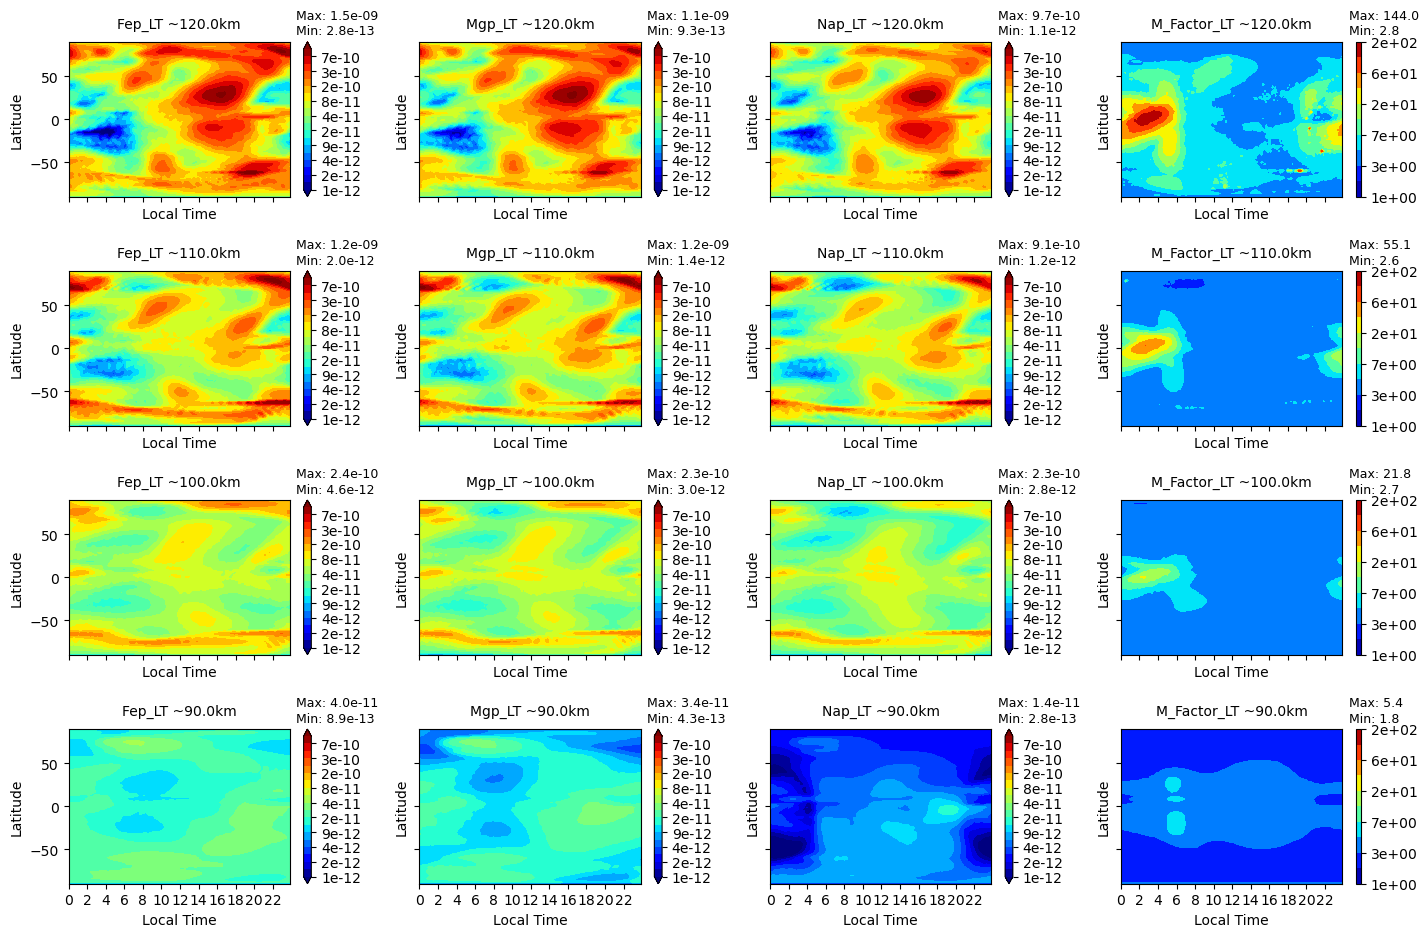

In [168]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from matplotlib.colors import LogNorm

# Your data loading and variable assignments...

# Desired altitudes in reverse order
desired_altitudes_km = [120.0, 110.0, 100.0, 90.0]

# Create a 4x4 subplot grid
fig, axs = plt.subplots(4, 4, figsize=(16, 10), sharex=True, sharey=True)

# Metal variables
metals = ['Fep_LT', 'Mgp_LT', 'Nap_LT', 'M_Factor_LT']

for i, metal in enumerate(metals):
    for j, desired_altitude_km in enumerate(desired_altitudes_km):
        
        # Find the index of the closest altitude in geopH
        closest_altitude_index = np.abs(Zavg_sliced - desired_altitude_km).argmin(dim='lev')

        # Use the index to select values from the metal variable
        if metal != 'M_Factor_LT':
            sel_metal = ds_M_Factor_LT[metal].isel(lev=closest_altitude_index)
        else:
            sel_metal = M_Factor_LT.isel(lev=closest_altitude_index)

        max_value = sel_metal.values.max()
        min_value = sel_metal.values.min()
        
        if metal != 'M_Factor_LT':
            formatted_max_value = f'{max_value:.1e}'       
            formatted_min_value = f'{min_value:.1e}'
        else:
            formatted_max_value = f'{max_value:.1f}'
            formatted_min_value = f'{min_value:.1f}'
        
        # Plot on the corresponding subplot
        if metal != 'M_Factor_LT':
            contour = axs[j, i].contourf(LT, lat, sel_metal, cmap='jet',
                                     norm=LogNorm(),
                                     levels=np.logspace(-12, -9, 20),
                                     extend='both')
        else:
            contour = axs[j, i].contourf(LT, lat, sel_metal, cmap='jet'
                                     , norm=LogNorm()
                                     #, levels=np.linspace(0, 10, 11)
                                         , levels=np.logspace(0,np.log10(150), 11)
                                     # , extend='max'
                                        )

        axs[j, i].set_xlabel('Local Time')
        axs[j, i].set_ylabel('Latitude')
        axs[j, i].set_title(f'{season} {metal} ~{desired_altitude_km}km', fontsize='10', pad=10)

        LT_ticks = np.arange(0, 24, 24/144)
        axs[j, i].set_xticks(LT_ticks[::12])
        ax.set_xticklabels(LT_ticks[::12])

        
        if metal != 'M_Factor_LT':
            #cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
            cbar = plt.colorbar(contour, ax=axs[j, i], orientation='vertical', format='%.0e')
        else:
            cbar = plt.colorbar(contour, ax=axs[j, i], orientation='vertical', pad=0.05, aspect=30, format='%.0e')

        annotation_text = f'Max: {formatted_max_value}'
        axs[j, i].text(1.03, 1.17, annotation_text, ha='left', va='center', fontsize=9, transform=axs[j, i].transAxes)

        annotation2_text = f'Min: {formatted_min_value}'
        axs[j, i].text(1.03, 1.07, annotation2_text, ha='left', va='center', fontsize=9, transform=axs[j, i].transAxes)

    
    
plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Adjust layout for suptitle

figname = f'M_Factor_LT_{season}_Mp_LT_{desired_altitude_km}.png'
plt.savefig('./Figures/Factor/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()




# Metal Ratios: Lat - LT Plots

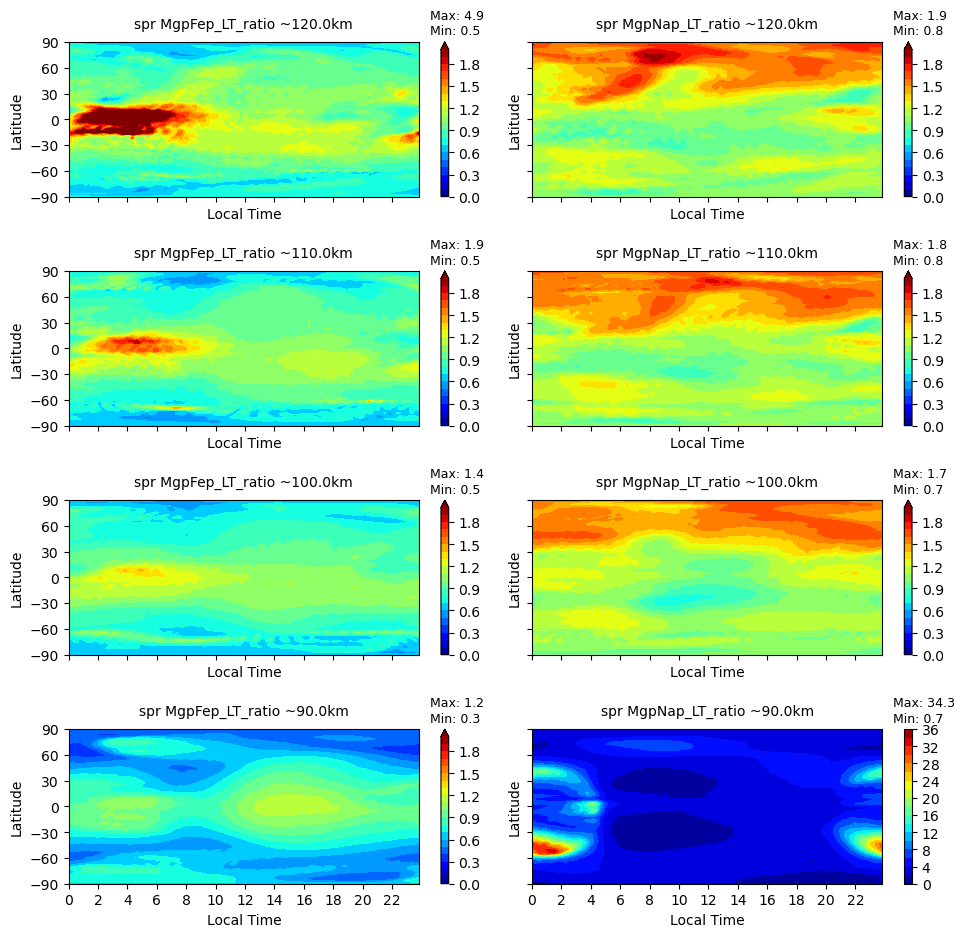

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from matplotlib.colors import LogNorm

season = 'spr'
ds_M_Factor_LT = xr.open_dataset(f'./Nc_Files/Factor/M_Factor_{season}_LT_81-130km.nc')


M_Factor_LT = ds_M_Factor_LT['M_Factor_LT']
lev = ds_M_Factor_LT['lev']
lat = ds_M_Factor_LT['lat']
LT = ds_M_Factor_LT['LT']
Zavg_sliced = ds_M_Factor_LT['Zavg_sliced']

Fep_LT = ds_M_Factor_LT['Fep_LT']
Mgp_LT = ds_M_Factor_LT['Mgp_LT']
Nap_LT = ds_M_Factor_LT['Nap_LT']


# Desired altitudes in reverse order
desired_altitudes_km = [120.0, 110.0, 100.0, 90.0]

# Create a 4x4 subplot grid
fig, axs = plt.subplots(4,2, figsize=(11, 10), sharex=True, sharey=True)


metal_ratios_str = ['MgpFep_LT_ratio', 'MgpNap_LT_ratio']



for j, desired_altitude_km in enumerate(desired_altitudes_km):
    # Find the index of the closest altitude in geopH
    closest_altitude_index = np.abs(Zavg_sliced - desired_altitude_km).argmin(dim='lev')
    
    sel_Fep = Fep_LT.isel(lev=closest_altitude_index)
    sel_Mgp = Mgp_LT.isel(lev=closest_altitude_index)
    sel_Nap = Nap_LT.isel(lev=closest_altitude_index)
    
    MgpFep_LT_ratio = sel_Mgp / sel_Fep
    MgpNap_LT_ratio = sel_Mgp / sel_Nap
    
    metal_ratios = [MgpFep_LT_ratio, MgpNap_LT_ratio]

    
    for i, metal in enumerate(metal_ratios):
        max_value = metal.values.max()
        min_value = metal.values.min()
        formatted_max_value = f'{max_value:.1f}'
        formatted_min_value = f'{min_value:.1f}'
        
        if i == 1 and j == 3:
            contour = axs[j, i].contourf(LT, lat, metal, cmap='jet',
                                     #norm=LogNorm(),
                                     levels=np.linspace(0,36,19),
                                     #extend='max'
                                        )
        else:
            contour = axs[j, i].contourf(LT, lat, metal, cmap='jet',
                                     #norm=LogNorm(),
                                     levels=np.linspace(0,2,21),
                                     extend='max'
                                        )
 
        axs[j, i].set_xlabel('Local Time')
        axs[j, i].set_ylabel('Latitude')
        axs[j, i].set_title(f'{season} {metal_ratios_str[i]} ~{desired_altitude_km}km', fontsize='10', pad=10)

        axs[j, i].set_yticks(np.linspace(-90, 90, 7))
        LT_ticks = np.arange(0, 24, 24/144)
        axs[j, i].set_xticks(LT_ticks[::12])
        #axs[j,i].set_xticklabels(LT_ticks[::12])


        cbar = plt.colorbar(contour, ax=axs[j, i], orientation='vertical')#, format='%.0e')

        annotation_text = f'Max: {formatted_max_value}'
        axs[j, i].text(1.03, 1.17, annotation_text, ha='left', va='center', fontsize=9, transform=axs[j, i].transAxes)

        annotation2_text = f'Min: {formatted_min_value}'
        axs[j, i].text(1.03, 1.07, annotation2_text, ha='left', va='center', fontsize=9, transform=axs[j, i].transAxes)

    
    
plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Adjust layout for suptitle

figname = f'M_LT_ratios_{season}_LT-Alt.png'
plt.savefig('./Figures/Factor/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()




# Metal Ratios:  Lat-Altitude Plot

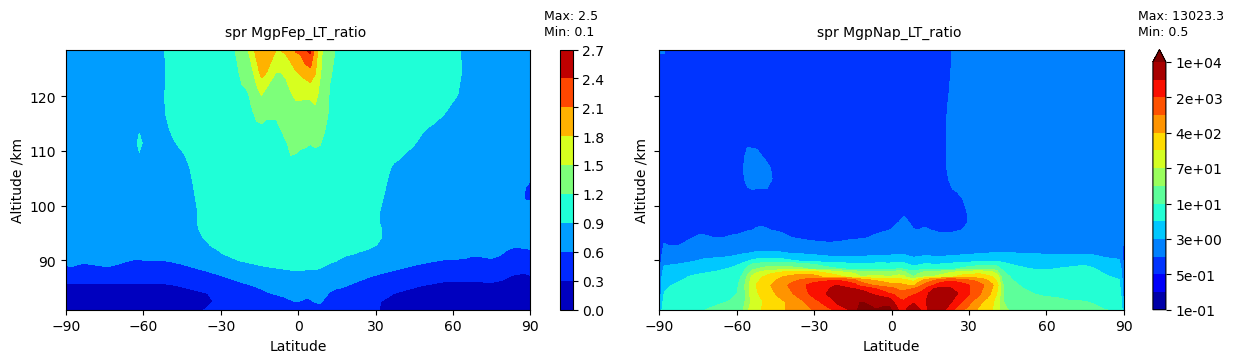

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from matplotlib.colors import LogNorm

season = 'spr'
ds_M_Factor_LT = xr.open_dataset(f'./Nc_Files/Factor/M_Factor_{season}_LT_81-130km.nc')


M_Factor_LT = ds_M_Factor_LT['M_Factor_LT']
lev = ds_M_Factor_LT['lev']
lat = ds_M_Factor_LT['lat']
LT = ds_M_Factor_LT['LT']
Zavg_sliced = ds_M_Factor_LT['Zavg_sliced']

Fep_LT = ds_M_Factor_LT['Fep_LT']
Mgp_LT = ds_M_Factor_LT['Mgp_LT']
Nap_LT = ds_M_Factor_LT['Nap_LT']


# Create a 4x4 subplot grid
fig, axs = plt.subplots(1,2, figsize=(14, 4), sharex=True, sharey=True)


metal_ratios_str = ['MgpFep_LT_ratio', 'MgpNap_LT_ratio']


MgpFep_LT_ratio = Mgp_LT / Fep_LT
MgpNap_LT_ratio = Mgp_LT / Nap_LT

MgpFep_LT_ratio_plot = MgpFep_LT_ratio.mean(dim='LT')
MgpNap_LT_ratio_plot = MgpNap_LT_ratio.mean(dim='LT')

metal_ratios = [MgpFep_LT_ratio_plot, MgpNap_LT_ratio_plot]


for i, metal in enumerate(metal_ratios):
    max_value = metal.values.max()
    min_value = metal.values.min()
    formatted_max_value = f'{max_value:.1f}'
    formatted_min_value = f'{min_value:.1f}'
    
    if i ==0:
        contour = axs[i].contourf(lat, Zavg_sliced, metal, cmap='jet'
                                 #norm=LogNorm(),
                                 #levels=np.linspace(0,36,19),
                                 #extend='max'
                                    )
    else:
        contour = axs[i].contourf(lat, Zavg_sliced, metal, cmap='jet',
                                 norm=LogNorm(),
                                 levels=np.logspace(-1,4,15),
                                 extend='max'                                  
                                    )

    axs[i].set_ylabel('Altitude /km')
    
    axs[i].set_xlabel('Latitude')
    axs[i].set_xticks(np.linspace(-90, 90, 7))
    
    axs[i].set_title(f'{season} {metal_ratios_str[i]} ', fontsize='10', pad=10)

    
    if i == 0:
        cbar = plt.colorbar(contour, ax=axs[i], orientation='vertical')#, format='%.0e')
    else:
        cbar = plt.colorbar(contour, ax=axs[i], orientation='vertical', format='%.0e')
        
    annotation_text = f'Max: {formatted_max_value}'
    axs[i].text(1.03, 1.13, annotation_text, ha='left', va='center', fontsize=9, transform=axs[i].transAxes)

    annotation2_text = f'Min: {formatted_min_value}'
    axs[i].text(1.03, 1.07, annotation2_text, ha='left', va='center', fontsize=9, transform=axs[i].transAxes)


plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Adjust layout for suptitle

figname = f'M_LT_ratios_{season}_Lat-Alt.png'
plt.savefig('./Figures/Factor/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()




In [85]:
# Find the indices of the maximum value in MgpNap_LT_ratio_plot
max_value = np.max(MgpNap_LT_ratio_plot.values)
max_indices = np.where(MgpNap_LT_ratio_plot.values == max_value)

print(max_value)
print(max_indices)

# Find the indices of the minimum value in MgpNap_LT_ratio_plot
min_value = np.min(MgpNap_LT_ratio_plot.values)
min_indices = np.where(MgpNap_LT_ratio_plot.values == min_value)

print(min_value)
print(min_indices)


print( max_indices[1][0] )
print( max_indices[0][0] )

# Get the corresponding values
max_lev , max_lat  = Zavg_sliced.values[max_indices[0][0]] , lat.values[max_indices[1][0]]
min_lev , min_lat = Zavg_sliced.values[min_indices[0][0]] , lat.values[min_indices[1][0]]

# Get the ratio values
max_ratio, min_ratio = max_value, min_value

# Print the values
print("Maximum MgpNap_LT_ratio_plot value:")
print(f"Latitude: {max_lat}")
print(f"Altitude: {max_lev} km")
print(f"MgpNap_LT_ratio_plot: {max_ratio}")

print("\nMinimum MgpNap_LT_ratio_plot value:")
print(f"Latitude: {min_lat}")
print(f"Altitude: {min_lev} km")
print(f"MgpNap_LT_ratio_plot: {min_ratio}")



13023.261639768702
(array([24]), array([42]))
0.547105291029526
(array([21]), array([0]))
42
24
Maximum MgpNap_LT_ratio_plot value:
Latitude: -10.421052631578945
Altitude: 80.99885559082031 km
MgpNap_LT_ratio_plot: 13023.261639768702

Minimum MgpNap_LT_ratio_plot value:
Latitude: -90.0
Altitude: 85.45559692382812 km
MgpNap_LT_ratio_plot: 0.547105291029526


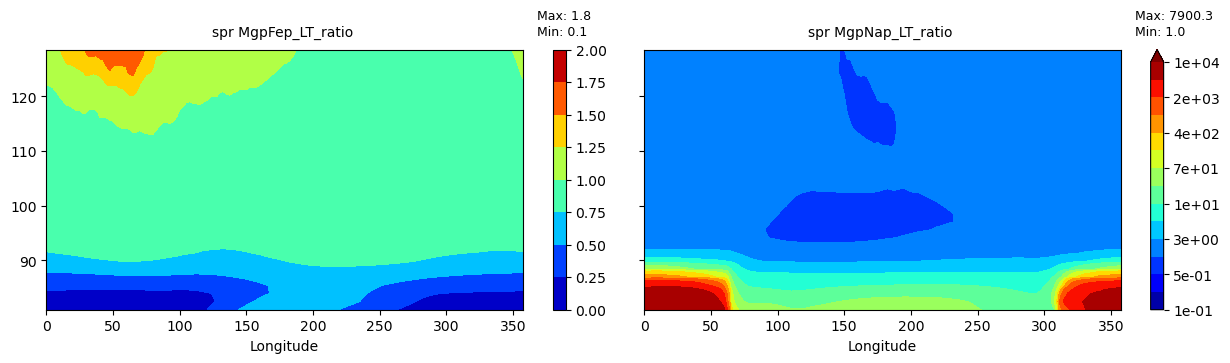

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from matplotlib.colors import LogNorm

season = 'spr'
ds_M_Factor_LT = xr.open_dataset(f'./Nc_Files/Factor/M_Factor_{season}_LT_81-130km.nc')


M_Factor_LT = ds_M_Factor_LT['M_Factor_LT']
lev = ds_M_Factor_LT['lev']
lat = ds_M_Factor_LT['lat']
LT = ds_M_Factor_LT['LT']
Zavg_sliced = ds_M_Factor_LT['Zavg_sliced']

Fep_LT = ds_M_Factor_LT['Fep_LT']
Mgp_LT = ds_M_Factor_LT['Mgp_LT']
Nap_LT = ds_M_Factor_LT['Nap_LT']


fig, axs = plt.subplots(1,2, figsize=(14, 4), sharex=True, sharey=True)


metal_ratios_str = ['MgpFep_LT_ratio', 'MgpNap_LT_ratio']


MgpFep_LT_ratio = Mgp_LT / Fep_LT
MgpNap_LT_ratio = Mgp_LT / Nap_LT

MgpFep_LT_ratio_plot = MgpFep_LT_ratio.mean(dim='lat')
MgpNap_LT_ratio_plot = MgpNap_LT_ratio.mean(dim='lat')

metal_ratios = [MgpFep_LT_ratio_plot, MgpNap_LT_ratio_plot]


for i, metal in enumerate(metal_ratios):
    max_value = metal.values.max()
    min_value = metal.values.min()
    formatted_max_value = f'{max_value:.1f}'
    formatted_min_value = f'{min_value:.1f}'
    
    if i ==0:
        contour = axs[i].contourf(lon, Zavg_sliced, metal, cmap='jet'
                                 #norm=LogNorm(),
                                 #levels=np.linspace(0,36,19),
                                 #extend='max'
                                    )
    else:
        contour = axs[i].contourf(lon, Zavg_sliced, metal, cmap='jet',
                                 norm=LogNorm(),
                                 levels=np.logspace(-1,4,15),
                                 extend='max'                                  
                                    )

    axs[i].set_xlabel('Altitude /km')
    
    axs[i].set_xlabel('Longitude')
    #axs[i].set_xticks(np.linspace(-90, 90, 7))
    
    axs[i].set_title(f'{season} {metal_ratios_str[i]} ', fontsize='10', pad=10)

    
    if i == 0:
        cbar = plt.colorbar(contour, ax=axs[i], orientation='vertical')#, format='%.0e')
    else:
        cbar = plt.colorbar(contour, ax=axs[i], orientation='vertical', format='%.0e')
        
    annotation_text = f'Max: {formatted_max_value}'
    axs[i].text(1.03, 1.13, annotation_text, ha='left', va='center', fontsize=9, transform=axs[i].transAxes)

    annotation2_text = f'Min: {formatted_min_value}'
    axs[i].text(1.03, 1.07, annotation2_text, ha='left', va='center', fontsize=9, transform=axs[i].transAxes)


plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Adjust layout for suptitle

figname = f'M_LT_ratios_{season}_Lon-Alt.png'
plt.savefig('./Figures/Factor/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


